# Aula 04 - Exercício 03
## PCA e Regressão Polinomial Multivariada
### Alunos:
 - 
 - 
 

# PCA
 O conjunto Iris consiste na medida de 4 características de plantas e seus respectivos tipos. Embora não é possível visualizar o conjunto de 4 dimensões, podemos utilizar a técnica PCA para reduzir a dimensionalidade do conjunto para 2 ou 3 dimensões.
- Utilize a técnica PCA para visualizar em 2 dimensões o conjunto Iris, já carregado abaixo. 
Lembre-se que os dados devem estar normalizados e centrados na média antes de aplicar o PCA.
  - Dica: Utilize a classe StandardScaler para pré-processar os dados

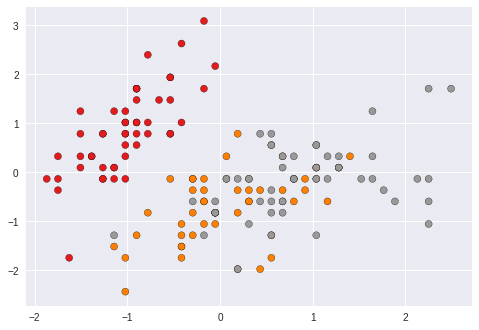

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target
#####

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
x_2_dim = pca.fit_transform(x)

#####
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')



---

- Mostre a variância e a porcentagem da variância que é expressa por cada componente principal.
  - Dica: Utilize as variáveis `explained_variance_`  e `explained_variance_ratio_`  da classe PCA. 

In [0]:
print(pca.explained_variance_ )
print(pca.explained_variance_ratio_)

[2.93808505 0.9201649 ]
[0.72962445 0.22850762]




---



Para os próximos exercícios utilizaremos a base de dados 'Boston House Prices'.  Os dados possuem dimensionalidade 10, e são distribuidos em 442 exemplos. O pré-carregamento da base já foi feito abaixo.

- Aplique PCA para reduzir a dimensionalidade para 3. Lembre-se de centralizar e normalizar os dados antes de aplicar o PCA

In [0]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Boston
data = datasets.load_boston()
Y = data.target
X = data.data

X = StandardScaler().fit_transform(X)

pca_3 = PCA(n_components=3)
X_3 = pca_3.fit_transform(X)



---

- Novamente, aplique o algoritmo de PCA para reduzir o número de variáveis do conjunto original para 4.

In [0]:
pca_4 = PCA(n_components=4)
X_4 = pca_4.fit_transform(X)



---

- Faça regressão utilizando uma reta no conjunto com dimensão 3 e calcule seu score R2, MAE e MSE.

In [5]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_3, Y)
Y_pred = model.predict(X_3)

print("R2 score %.2f" % r2_score(Y_pred, Y))
print("MAE score %.2f" % mean_absolute_error(Y_pred, Y))
print("MSE score %.2f" % mean_squared_error(Y_pred, Y))

R2 score 0.43
MAE score 3.83
MSE score 30.74




---

- Agora faça regressão utilizando uma reta com os dados de dimensionalidade 4 e calcule seu score R2, MAE e MSE.

In [6]:
model2 = LinearRegression()
model2.fit(X_4, Y)
Y_pred = model2.predict(X_4)

print("R2 score %.2f" % r2_score(Y_pred, Y))
print("MAE score %.2f" % mean_absolute_error(Y_pred, Y))
print("MSE score %.2f" % mean_squared_error(Y_pred, Y))

R2 score 0.46
MAE score 3.74
MSE score 29.74




---

- Utilizando uma função quadrática, faça regressão utilizando as 3 variáveis mais relevantes e calcule seu score R2, MAE e MSE

In [7]:
from sklearn.preprocessing import PolynomialFeatures

p_2 = PolynomialFeatures(degree=2)

X_3_t = p_2.fit_transform(X_3)
model_p2 = LinearRegression(fit_intercept=False)
model_p2.fit(X_3_t, Y)
Y_pred = model_p2.predict(X_3_t)

print("R2 score %.2f" % r2_score(Y_pred, Y))
print("MAE score %.2f" % mean_absolute_error(Y_pred, Y))
print("MSE score %.2f" % mean_squared_error(Y_pred, Y))

R2 score 0.58
MAE score 3.32
MSE score 25.02




---

- Por fim, faça regressão no conjunto de dimensão 4 utilizando uma função quadrática. Calcule seu score R2, MAE e MSE e compare com os modelos gerados anteriormente.


In [8]:
p_3 = PolynomialFeatures(degree=2)

X_4_t = p_3.fit_transform(X_4)

model_p3 = LinearRegression(fit_intercept=False)
model_p3.fit(X_4_t, Y)
Y_pred = model_p3.predict(X_4_t)

print("R2 score %.2f" % r2_score(Y_pred, Y))
print("MAE score %.2f" % mean_absolute_error(Y_pred, Y))
print("MSE score %.2f" % mean_squared_error(Y_pred, Y))

R2 score 0.66
MAE score 3.06
MSE score 21.40


### Resposta
O modelo que melhor descreveu os dados foi a função quadrática com as 4 componentes principais mais relevantes. Seu score R2 foi melhor que as outras e seus erros quadraticos e absolutos foram menores.